### Preliminary Nucleotide Importance Analysis

**Authorship:**
Adam Klie, *04/06/2022*
***
**Description:**
Notebook to perform an an analysis of per nucleotide feature importances given by a preliminary neural network
***
<div class="alert alert-block alert-warning">
<b>TODOs</b>:
<ul>
    <b><li></li></b>
    <b><li></li></b>
    <b><li></li></b>
    </ul>
</div>

# Set-up

In [154]:
# The classics
import pandas as pd
import numpy as np
np.random.seed(13)

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.style.use("presentation")

# Homebrew
import bobs_toolbelt

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

In [155]:
# File paths
imp_file = "../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/preliminary_importance_scores.tsv"
bin_imp_file = "../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/binary_importance_scores.tsv"
metadata_file = "../data/2021_OLS_Library/2021_OLS_Library.tsv"

In [156]:
imp_df = pd.read_csv(imp_file, sep="\t")
bin_imp_df = pd.read_csv(bin_imp_file)
score_df = imp_df[imp_df.columns[imp_df.columns.str.contains("POS")]]
bin_score_df = bin_imp_df[bin_imp_df.columns[bin_imp_df.columns.str.contains("POS")]]
meta_df = pd.read_csv(metadata_file, sep="\t", low_memory=False)

/cellar/users/aklie/opt/miniconda3/envs/seq_tools_dev/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3229: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [157]:
indexes = np.random.choice(imp_df.index, size=50000)
importances = imp_df.loc[indexes]
metadata = meta_df.loc[indexes]
scores = score_df.loc[indexes]
bin_scores = bin_score_df.loc[indexes]

In [159]:
data = scores

# Unsupervised analysis

## Run PCA

In [160]:
from bobs_toolbelt import unsupervised

In [161]:
pca, pca_df = unsupervised.scaled_PCA(data)
pca_embedding = pca_df.values

Make sure your matrix is sample by feature


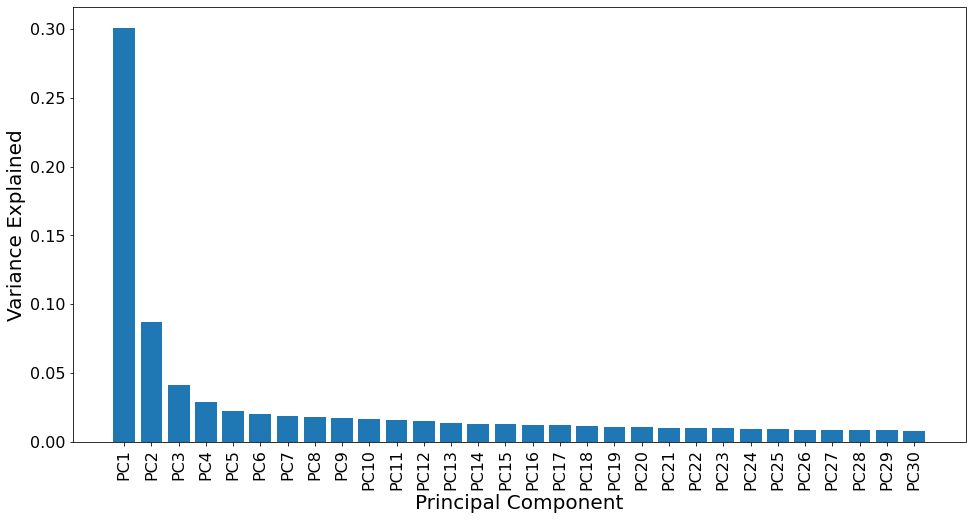

In [162]:
pc_var_explained = unsupervised.make_skree_plot(pca)

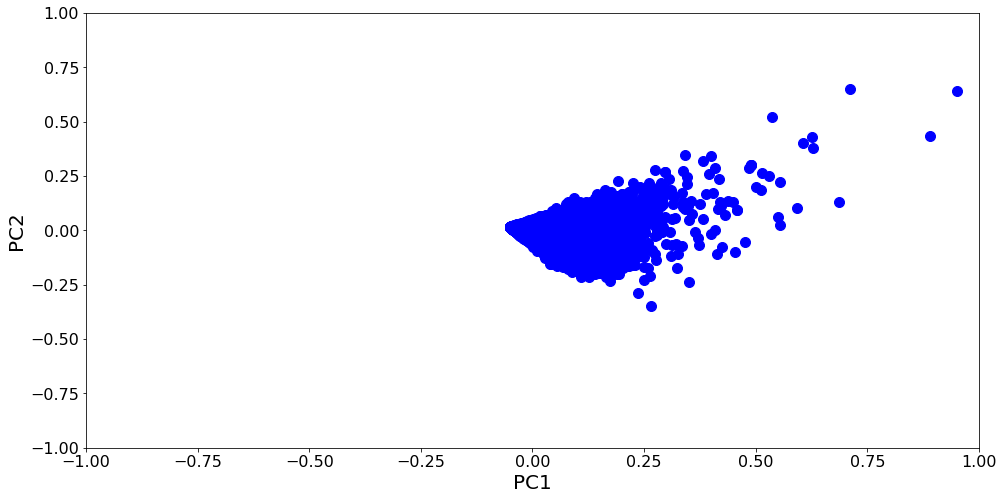

In [163]:
ax = unsupervised.pca_plot(pca_embedding)

## Run UMAP

In [164]:
reducer, umap_df = unsupervised.scaled_UMAP(scores)

Make sure your matrix is sample by feature


In [165]:
umap_embedding =  umap_df.values

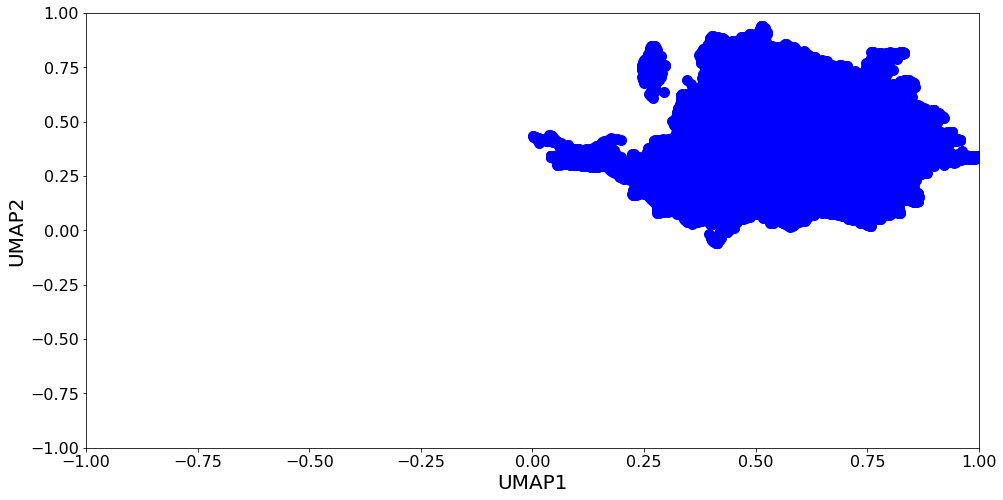

In [166]:
ax = unsupervised.umap_plot(umap_embedding)

## Visualize

In [167]:
metadata.columns

Index(['NAME', 'SEQ', 'MPRA_FXN', 'MICROSCOPE_FXN', 'ACTIVITY_SUMRNA_NUMDNA',
       'SEQ_LEN', 'linker_1', 'TFBS_1', 'linker_2', 'TFBS_2', 'linker_3',
       'TFBS_3', 'linker_4', 'TFBS_4', 'linker_5', 'TFBS_5', 'linker_6'],
      dtype='object')

In [168]:
col = "MPRA_FXN"
metadata[col] = metadata[col].fillna(-9)
label_map = metadata[col]
cmap = mpl.cm.get_cmap("tab20")
color_labels = metadata[col].unique()
pal = sns.color_palette("tab20", len(color_labels))
color_map = dict(zip(color_labels, pal))

In [169]:
color_map

{-9.0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 1.0: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 0.0: (1.0, 0.4980392156862745, 0.054901960784313725)}

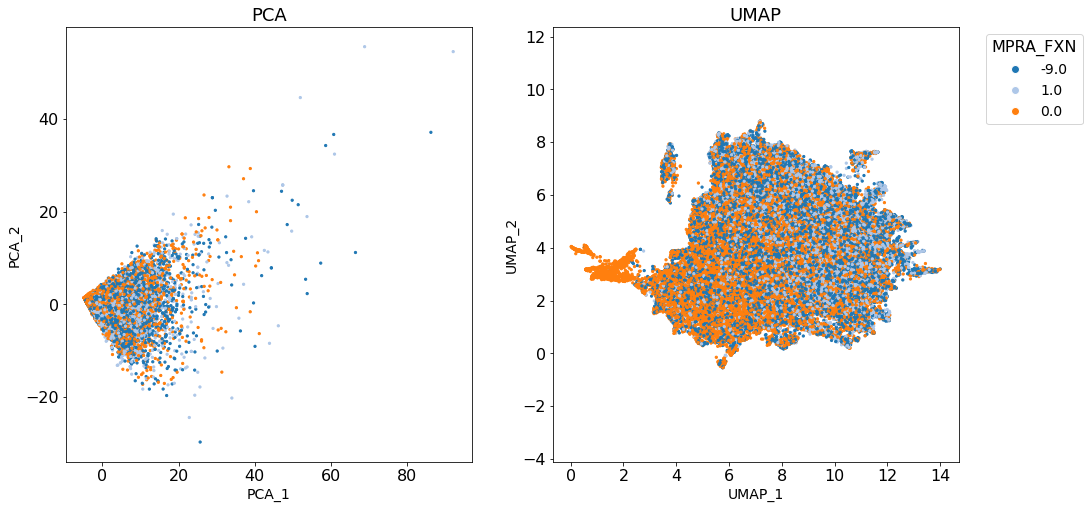

In [170]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

ax[0].scatter(
    x=pca_embedding[:, 0],
    y=pca_embedding[:, 1],
    c=label_map.map(color_map),
    s=5
)
ax[0].set_title('PCA', fontsize=18)
ax[0].set_xlabel('PCA_1', fontsize=14)
ax[0].set_ylabel('PCA_2', fontsize=14)

ax[1].scatter(
    x=umap_embedding[:, 0],
    y=umap_embedding[:, 1],
    c=label_map.map(color_map),
    s=5
)
ax[1].set_title('UMAP', fontsize=18)
ax[1].set_xlabel('UMAP_1', fontsize=14)
ax[1].set_ylabel('UMAP_2', fontsize=14)

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in color_map.items()]
ax[1].legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16, title=col)
plt.gca().set_aspect('equal', 'datalim')

In [171]:
full_df = pd.concat([metadata, pca_df, umap_df], axis=1)
#full_df[col] = full_df[col].fillna(-9)
len(full_df)

50000

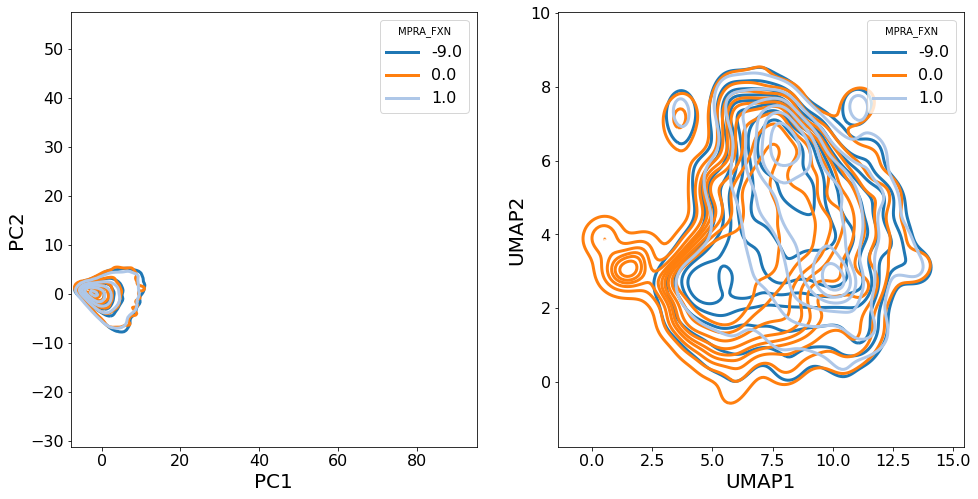

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
sns.kdeplot(data=full_df, x="PC1", y="PC2", hue="MPRA_FXN", fill=False, palette=color_map, ax=ax[0])
sns.kdeplot(data=full_df, x="UMAP1", y="UMAP2", hue="MPRA_FXN", fill=False, palette=color_map, ax=ax[1])

In [173]:
full_df["ACTIVITY_SUMRNA_NUMDNA"]

178352    0.398761
253456    0.221923
256742    0.484354
164706    0.708624
218868    0.044391
            ...   
125533    0.086921
100145    0.466000
247254    0.864008
63988     0.127178
374864    0.073420
Name: ACTIVITY_SUMRNA_NUMDNA, Length: 50000, dtype: float64

/cellar/users/aklie/opt/miniconda3/envs/seq_tools_dev/lib/python3.7/site-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


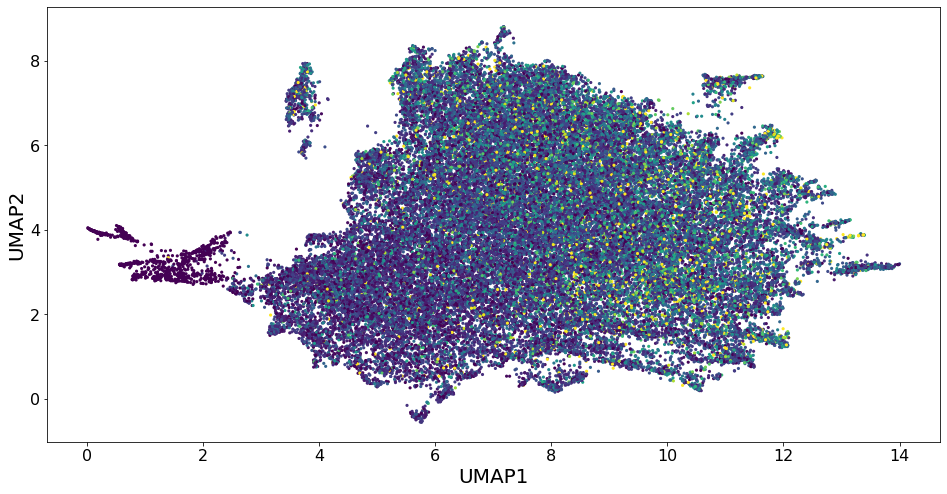

In [174]:
sns.scatterplot(data=full_df, x="UMAP1", y="UMAP2", hue="ACTIVITY_SUMRNA_NUMDNA", palette="viridis", hue_norm=(0, 1), s=10, linewidth=0)
plt.legend([],[], frameon=False)

# Distributions

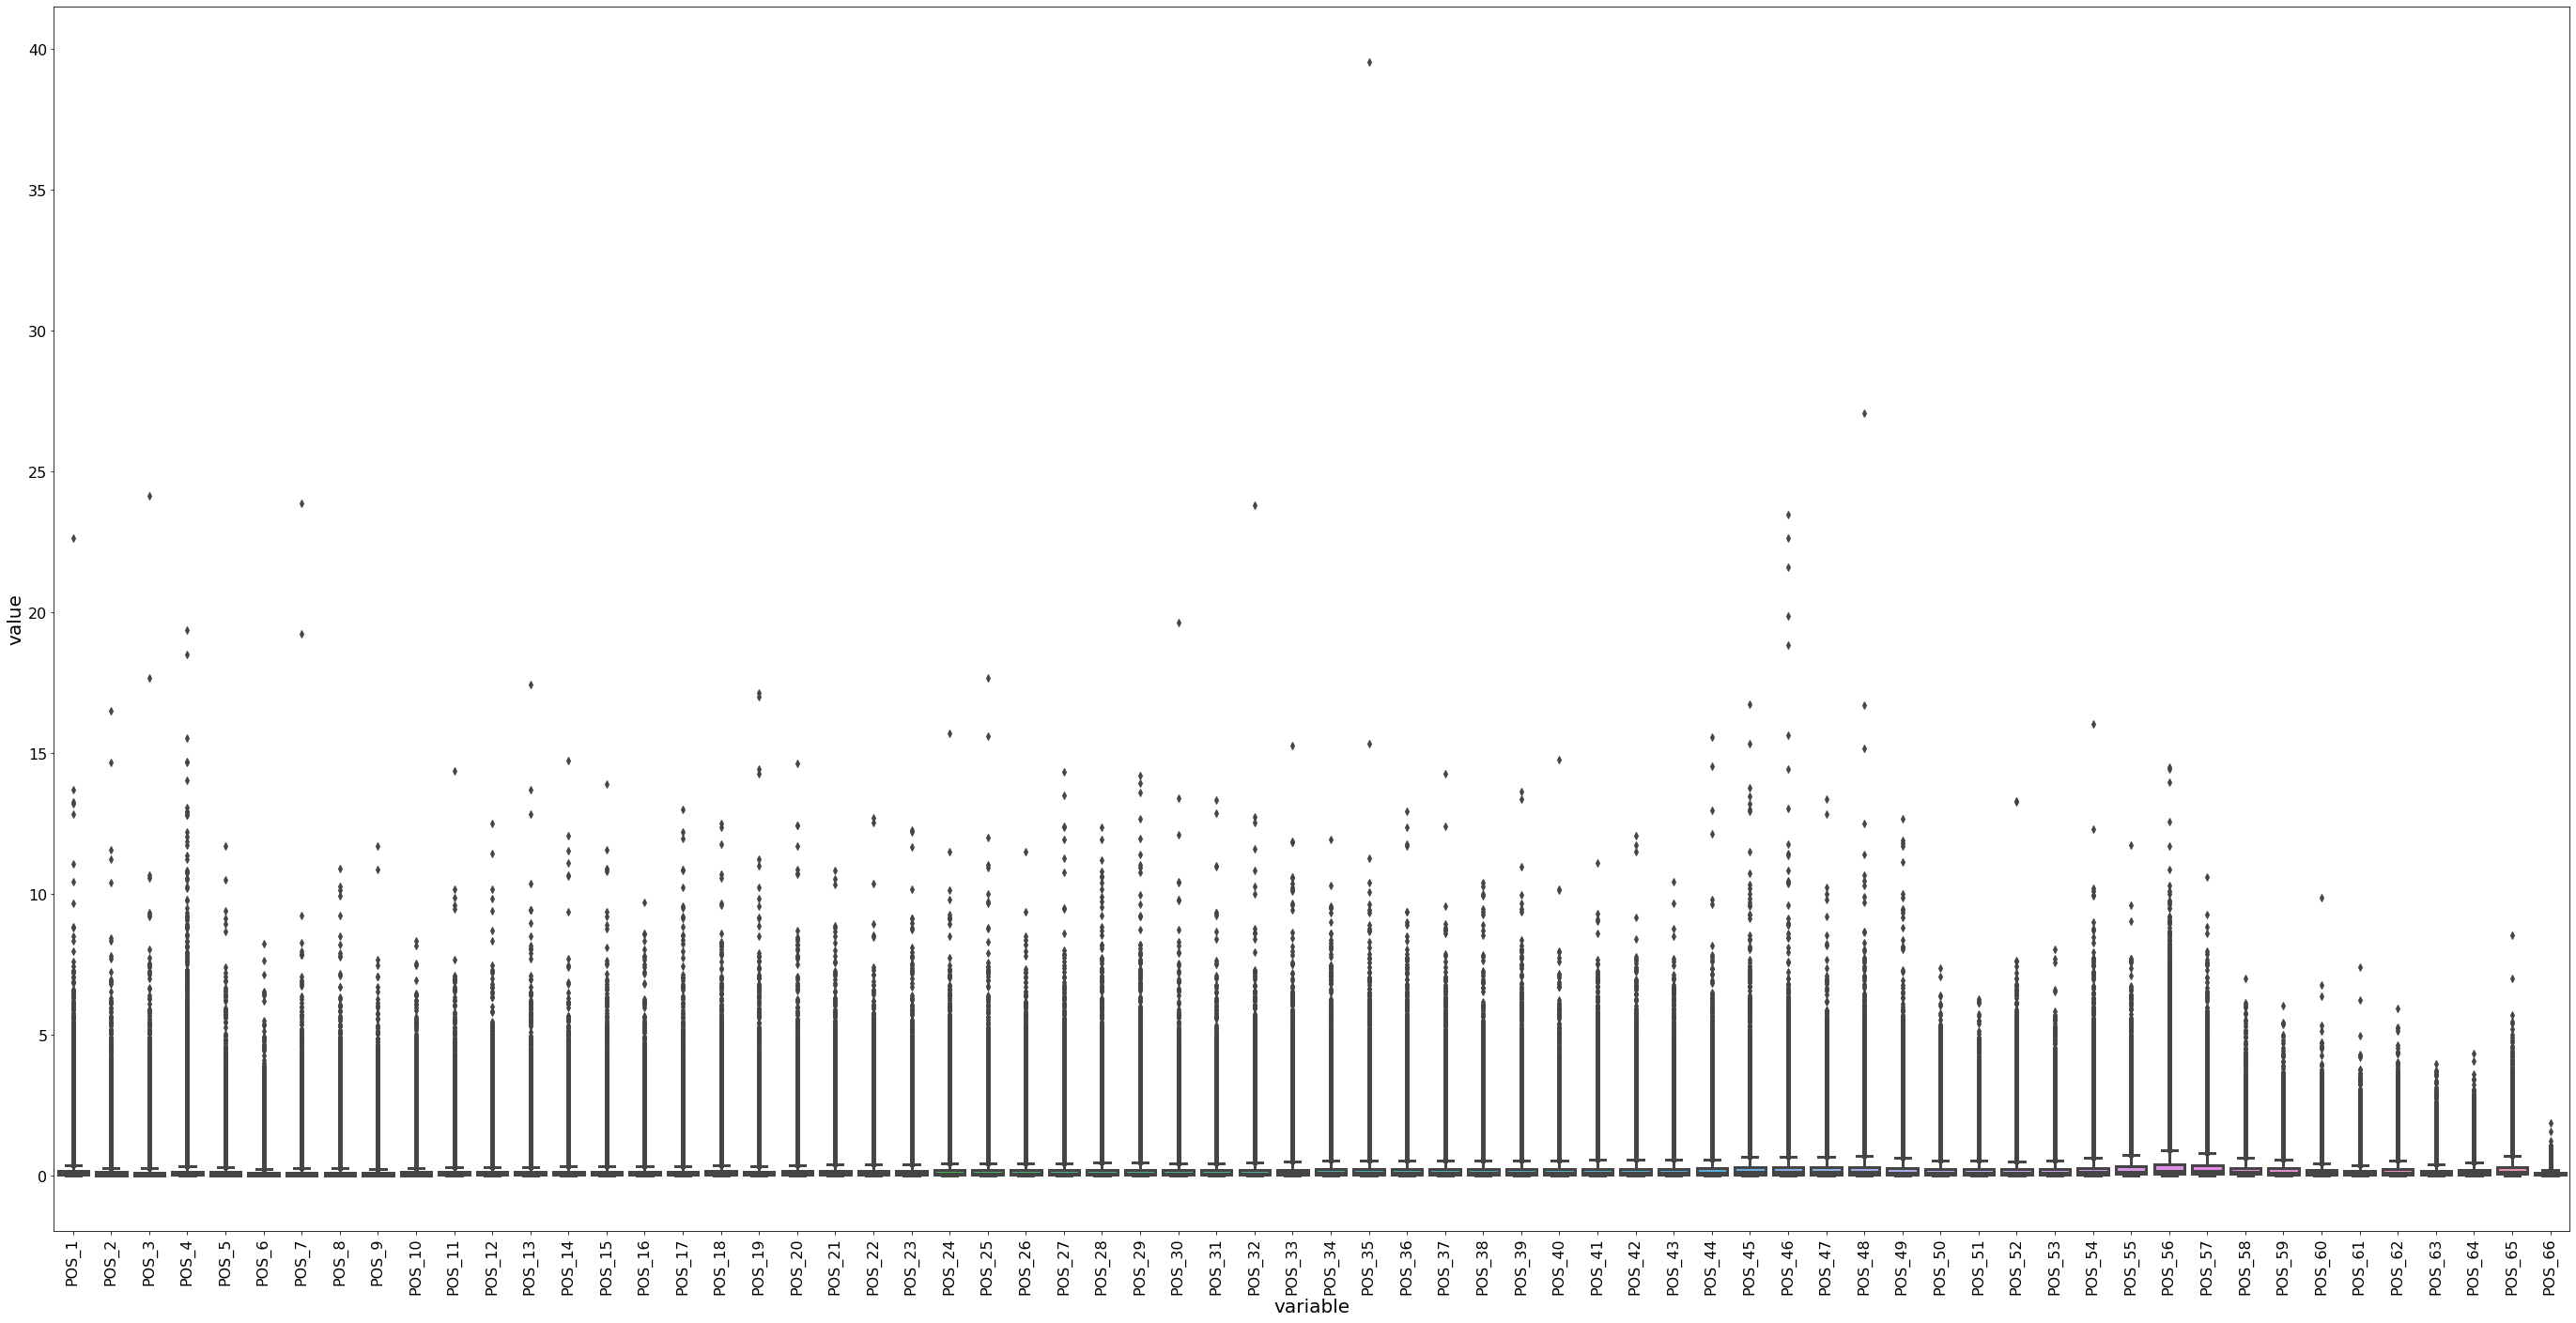

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(48, 24))
sns.boxplot(data=score_df.melt(), x="variable", y="value")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [176]:
cut_offs = score_df.mean(axis=1) + score_df.std(axis=1)*1
#cut_offs = score_df.quantile(0.75, axis=1) 

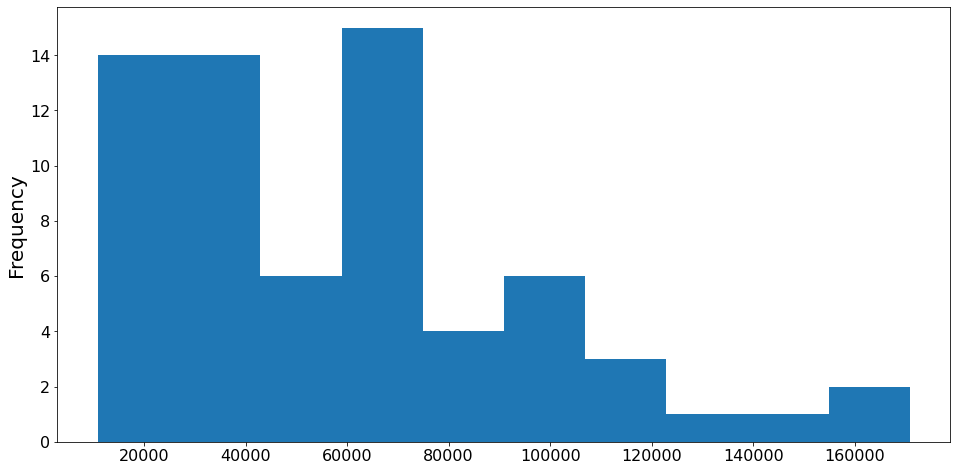

In [177]:
score_df.ge(cut_offs, axis=0).sum(axis=0).plot(kind="hist")

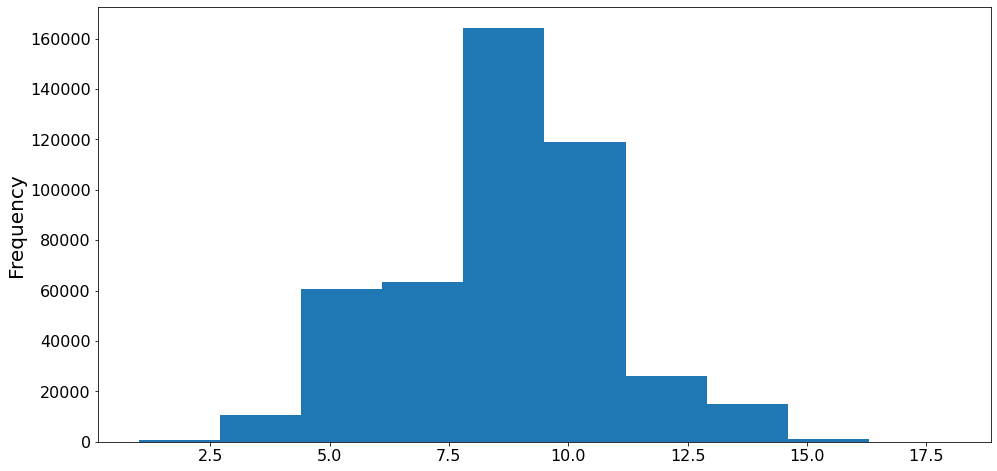

In [178]:
score_df.ge(cut_offs, axis=0).sum(axis=1).plot(kind="hist")

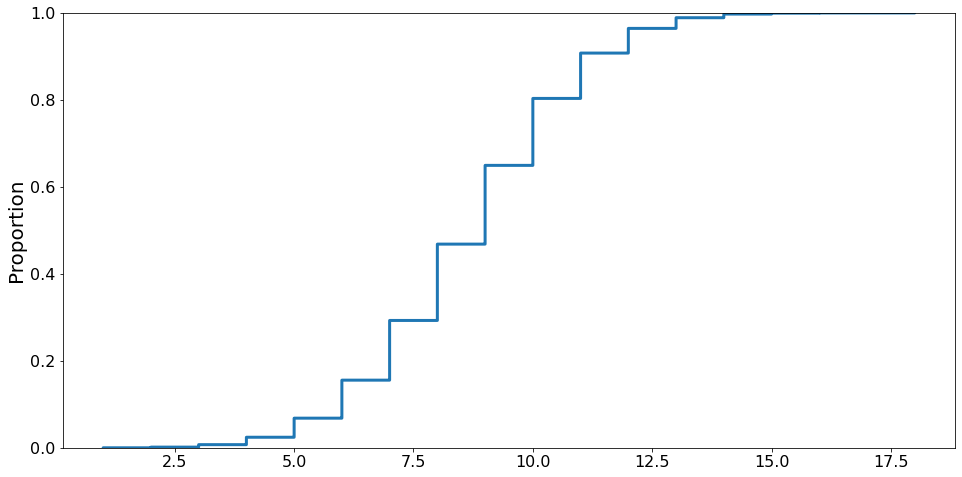

In [179]:
sns.ecdfplot(score_df.ge(cut_offs, axis=0).sum(axis=1))

In [180]:
bin_imp_df = score_df.ge(cut_offs, axis=0).astype(int)

In [181]:
bin_imp_df.columns = "BIN_" + bin_imp_df.columns

In [182]:
cut_offs.name = "THRESHOLD"

In [183]:
full_df = meta_df[["NAME", "SEQ", "ACTIVITY_SUMRNA_NUMDNA"]]

In [184]:
full_df["THRESHOLD"] = cut_offs.values.tolist()

/cellar/users/aklie/opt/miniconda3/envs/seq_tools_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
full_df["SCORES"] = score_df.values.tolist()

/cellar/users/aklie/opt/miniconda3/envs/seq_tools_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
full_df["BINARY_SCORES"] = bin_imp_df.values.tolist()

/cellar/users/aklie/opt/miniconda3/envs/seq_tools_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
full_df

,NAME,SEQ,ACTIVITY_SUMRNA_NUMDNA,THRESHOLD,SCORES,BINARY_SCORES
0,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0.611767,0.876144,"[0.5579593181610107, 0.4112656116485596, 0.033...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ..."
1,S1-G1F-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGAGATAACTAACGGAAGTTTTCGAAAAGGAAATT...,0.313011,0.365845,"[0.0813780426979065, 0.0784858912229538, 0.018...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,S1-G1R-S2-E1F-S3-E2F-S4-G2F-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0.387121,0.249039,"[0.014424501918256285, 0.08167347311973573, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3R-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0.000000,0.699609,"[0.3706955015659332, 0.348599910736084, 0.0402...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,S1-G1R-S2-E1R-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACTTCCGTTTTCGAAAAGGAAATT...,0.250995,0.306465,"[0.20759470760822296, 0.4514067471027374, 0.22...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
460795,S5-G3R-S4-G2F-S3-E2R-S2-E1F-S1-G1F-S6,CCTATCTTTGCTCAGATATTTTTCGAAATTTCCTTTAACGGAAGTC...,0.647397,0.363484,"[0.1159958690404892, 0.16664229333400726, 0.30...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
460796,S5-G3F-S4-G2F-S3-E2R-S2-E1R-S1-G1F-S6,AAGATAGGTGCTCAGATATTTTTCGAAATTTCCTTTAACTTCCGTC...,0.185930,0.150172,"[0.012269455939531326, 0.017445499077439308, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
460797,S5-G3R-S4-G2R-S3-E2R-S2-E1R-S1-G1F-S6,CCTATCTTTGCTCAATATCTTTTCGAAATTTCCTTTAACTTCCGTC...,0.180546,0.140815,"[0.02292570844292641, 0.020663142204284668, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
460798,S5-G3R-S4-G2F-S3-E2R-S2-E1R-S1-G1R-S6,CCTATCTTTGCTCAGATATTTTTCGAAATTTCCTTTAACTTCCGTC...,0.194393,0.229091,"[0.06152531877160072, 0.09306588768959044, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."


In [188]:
np.save("../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/preliminary_importance_scores_with_binary", full_df.values)

In [189]:
pd.DataFrame(np.load("../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/preliminary_importance_scores_with_binary.npy", allow_pickle=True), columns=["NAME", "SEQ", "ACTIVITY", "THRESHOLD", "SCORES", "BINARY_SCORES"])

,NAME,SEQ,ACTIVITY,THRESHOLD,SCORES,BINARY_SCORES
0,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0.611767,0.876144,"[0.5579593181610107, 0.4112656116485596, 0.033...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ..."
1,S1-G1F-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGAGATAACTAACGGAAGTTTTCGAAAAGGAAATT...,0.313011,0.365845,"[0.0813780426979065, 0.0784858912229538, 0.018...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,S1-G1R-S2-E1F-S3-E2F-S4-G2F-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0.387121,0.249039,"[0.014424501918256285, 0.08167347311973573, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3R-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0,0.699609,"[0.3706955015659332, 0.348599910736084, 0.0402...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,S1-G1R-S2-E1R-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACTTCCGTTTTCGAAAAGGAAATT...,0.250995,0.306465,"[0.20759470760822296, 0.4514067471027374, 0.22...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
460795,S5-G3R-S4-G2F-S3-E2R-S2-E1F-S1-G1F-S6,CCTATCTTTGCTCAGATATTTTTCGAAATTTCCTTTAACGGAAGTC...,0.647397,0.363484,"[0.1159958690404892, 0.16664229333400726, 0.30...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
460796,S5-G3F-S4-G2F-S3-E2R-S2-E1R-S1-G1F-S6,AAGATAGGTGCTCAGATATTTTTCGAAATTTCCTTTAACTTCCGTC...,0.18593,0.150172,"[0.012269455939531326, 0.017445499077439308, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
460797,S5-G3R-S4-G2R-S3-E2R-S2-E1R-S1-G1F-S6,CCTATCTTTGCTCAATATCTTTTCGAAATTTCCTTTAACTTCCGTC...,0.180546,0.140815,"[0.02292570844292641, 0.020663142204284668, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
460798,S5-G3R-S4-G2F-S3-E2R-S2-E1R-S1-G1R-S6,CCTATCTTTGCTCAGATATTTTTCGAAATTTCCTTTAACTTCCGTC...,0.194393,0.229091,"[0.06152531877160072, 0.09306588768959044, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."


In [166]:
bin_imp_df.index = imp_df["NAME"]
bin_imp_df["SEQ"] = imp_df["SEQ"].values
bin_imp_df[["SEQ"] + bin_imp_df.columns[bin_imp_df.columns.str.contains("POS")].to_list()].to_csv("../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/binary_importance_scores.tsv")

In [88]:
full_df = bin_imp_df[["SEQ"] + bin_imp_df.columns[bin_imp_df.columns.str.contains("POS")].to_list()]

In [105]:
bin_imp_df

,NAME,SEQ,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,...,POS_57,POS_58,POS_59,POS_60,POS_61,POS_62,POS_63,POS_64,POS_65,POS_66
0,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,S1-G1F-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGAGATAACTAACGGAAGTTTTCGAAAAGGAAATT...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,S1-G1R-S2-E1F-S3-E2F-S4-G2F-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3R-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,S1-G1R-S2-E1R-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACTTCCGTTTTCGAAAAGGAAATT...,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460795,S5-G3R-S4-G2F-S3-E2R-S2-E1F-S1-G1F-S6,CCTATCTTTGCTCAGATATTTTTCGAAATTTCCTTTAACGGAAGTC...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
460796,S5-G3F-S4-G2F-S3-E2R-S2-E1R-S1-G1F-S6,AAGATAGGTGCTCAGATATTTTTCGAAATTTCCTTTAACTTCCGTC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
460797,S5-G3R-S4-G2R-S3-E2R-S2-E1R-S1-G1F-S6,CCTATCTTTGCTCAATATCTTTTCGAAATTTCCTTTAACTTCCGTC...,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
460798,S5-G3R-S4-G2F-S3-E2R-S2-E1R-S1-G1R-S6,CCTATCTTTGCTCAGATATTTTTCGAAATTTCCTTTAACTTCCGTC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
score_df

,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,POS_10,...,POS_57,POS_58,POS_59,POS_60,POS_61,POS_62,POS_63,POS_64,POS_65,POS_66
0,0.5579593181610107,0.4112656116485596,0.033399783074855804,0.5954041481018066,0.08457626402378082,0.11849459260702133,0.09227492660284042,0.11390600353479385,0.1773296743631363,0.8096582889556885,...,1.0860828161239624,0.15348178148269653,0.08143101632595062,0.17468176782131195,0.0935627669095993,0.7605788707733154,0.11672164499759675,0.06722313910722733,0.0662924200296402,0.050201967358589165
1,0.0813780426979065,0.0784858912229538,0.018522141501307487,0.01772184669971466,0.021829823032021526,0.027755172923207283,0.09123215824365616,0.042794592678546906,0.06231791898608208,0.08244724571704865,...,0.4563256800174713,0.16828376054763794,0.18104615807533264,0.08726125955581665,0.20130623877048487,0.4512478113174439,0.18069788813591006,0.07759682834148407,0.06812946498394012,0.040833868086338036
2,0.014424501918256285,0.08167347311973573,0.053966637700796134,0.014531634747982025,0.07853514701128006,0.04695066064596176,0.10297937691211699,0.07329846918582916,0.01077185571193695,0.09429162740707396,...,0.02456960640847683,0.06425444781780243,0.10027047246694563,0.08240804821252823,0.1341111660003662,0.2351858615875244,0.1511959433555603,0.05709923803806305,0.0350303091108799,0.041587941348552704
3,0.3706955015659332,0.348599910736084,0.04029902070760727,0.4141108095645905,0.017495978623628616,0.16632619500160215,0.24669280648231506,0.21828401088714602,0.13742969930171967,0.5504513382911682,...,0.4413699209690094,0.3670004904270172,0.3523722290992737,0.1883237659931183,0.07979102432727814,0.9228130578994752,0.5415447950363159,0.6069135665893555,0.20211145281791687,0.1151118278503418
4,0.20759470760822296,0.4514067471027374,0.2288255095481873,0.17174142599105835,0.25755274295806885,0.07037480920553207,0.13860368728637695,0.09361554682254793,0.058325711637735374,0.07370033115148544,...,0.19633778929710388,0.17730069160461426,0.1805374026298523,0.4400598406791687,0.09511733800172806,0.2819675803184509,0.13109415769577026,0.028614278882741925,0.11068731546401978,0.13262683153152466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460795,0.1159958690404892,0.16664229333400726,0.301725834608078,0.09965138137340546,0.022868797183036804,0.09080970287322998,0.06757886707782745,0.007976226508617401,0.06169210374355316,0.2207125723361969,...,0.5549970865249634,0.2284484356641769,0.11174392700195312,0.2381579875946045,0.050660792738199234,0.495137870311737,0.13838481903076172,0.007652290165424347,0.5378302931785583,0.0668664276599884
460796,0.012269455939531326,0.017445499077439308,0.008846493437886238,0.013689972460269928,0.017800621688365936,0.03568369522690773,0.0034805508330464363,0.006764736492186785,0.124669149518013,0.010344643145799635,...,0.09220239520072936,0.009300919249653816,0.011987525969743729,0.13278844952583313,0.11019971966743468,0.007878396660089495,0.03821110725402832,0.013591475784778595,0.2926197648048401,0.09811435639858246
460797,0.02292570844292641,0.020663142204284668,0.016433142125606537,0.012611676007509232,0.03144284710288048,0.0397491566836834,0.03367145359516144,0.01949498057365417,0.02134986594319344,0.013352788984775543,...,0.28224068880081177,0.00508866086602211,0.13221120834350586,0.14163464307785034,0.00783258955925703,0.12389283627271652,0.02453406155109405,0.0508914552628994,0.23061156272888186,0.03948956727981568
460798,0.06152531877160072,0.09306588768959044,0.20193791389465326,0.11766791343688965,0.02803019993007183,0.06789055466651918,0.00011070072650909424,0.06438329815864563,0.10752730071544647,0.14126387238502502,...,0.09583358466625214,0.09977944940328598,0.10545103251934053,0.10107935220003128,0.04031366109848023,0.08140677213668822,0.05800274759531021,0.2169674038887024,0.08805768191814423,0.018409837037324902


In [101]:
score_df

,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,POS_10,...,POS_57,POS_58,POS_59,POS_60,POS_61,POS_62,POS_63,POS_64,POS_65,POS_66
0,0.557959,0.411266,0.033400,0.595404,0.084576,0.118495,0.092275,0.113906,0.177330,0.809658,...,1.086083,0.153482,0.081431,0.174682,0.093563,0.760579,0.116722,0.067223,0.066292,0.050202
1,0.081378,0.078486,0.018522,0.017722,0.021830,0.027755,0.091232,0.042795,0.062318,0.082447,...,0.456326,0.168284,0.181046,0.087261,0.201306,0.451248,0.180698,0.077597,0.068129,0.040834
2,0.014425,0.081673,0.053967,0.014532,0.078535,0.046951,0.102979,0.073298,0.010772,0.094292,...,0.024570,0.064254,0.100270,0.082408,0.134111,0.235186,0.151196,0.057099,0.035030,0.041588
3,0.370696,0.348600,0.040299,0.414111,0.017496,0.166326,0.246693,0.218284,0.137430,0.550451,...,0.441370,0.367000,0.352372,0.188324,0.079791,0.922813,0.541545,0.606914,0.202111,0.115112
4,0.207595,0.451407,0.228826,0.171741,0.257553,0.070375,0.138604,0.093616,0.058326,0.073700,...,0.196338,0.177301,0.180537,0.440060,0.095117,0.281968,0.131094,0.028614,0.110687,0.132627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460795,0.115996,0.166642,0.301726,0.099651,0.022869,0.090810,0.067579,0.007976,0.061692,0.220713,...,0.554997,0.228448,0.111744,0.238158,0.050661,0.495138,0.138385,0.007652,0.537830,0.066866
460796,0.012269,0.017445,0.008846,0.013690,0.017801,0.035684,0.003481,0.006765,0.124669,0.010345,...,0.092202,0.009301,0.011988,0.132788,0.110200,0.007878,0.038211,0.013591,0.292620,0.098114
460797,0.022926,0.020663,0.016433,0.012612,0.031443,0.039749,0.033671,0.019495,0.021350,0.013353,...,0.282241,0.005089,0.132211,0.141635,0.007833,0.123893,0.024534,0.050891,0.230612,0.039490
460798,0.061525,0.093066,0.201938,0.117668,0.028030,0.067891,0.000111,0.064383,0.107527,0.141264,...,0.095834,0.099779,0.105451,0.101079,0.040314,0.081407,0.058003,0.216967,0.088058,0.018410


In [100]:
imp_df[imp_df.columns[imp_df.columns.str.contains("POS")]]

,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,POS_10,...,POS_57,POS_58,POS_59,POS_60,POS_61,POS_62,POS_63,POS_64,POS_65,POS_66
0,0.557959,0.411266,0.033400,0.595404,0.084576,0.118495,0.092275,0.113906,0.177330,0.809658,...,1.086083,0.153482,0.081431,0.174682,0.093563,0.760579,0.116722,0.067223,0.066292,0.050202
1,0.081378,0.078486,0.018522,0.017722,0.021830,0.027755,0.091232,0.042795,0.062318,0.082447,...,0.456326,0.168284,0.181046,0.087261,0.201306,0.451248,0.180698,0.077597,0.068129,0.040834
2,0.014425,0.081673,0.053967,0.014532,0.078535,0.046951,0.102979,0.073298,0.010772,0.094292,...,0.024570,0.064254,0.100270,0.082408,0.134111,0.235186,0.151196,0.057099,0.035030,0.041588
3,0.370696,0.348600,0.040299,0.414111,0.017496,0.166326,0.246693,0.218284,0.137430,0.550451,...,0.441370,0.367000,0.352372,0.188324,0.079791,0.922813,0.541545,0.606914,0.202111,0.115112
4,0.207595,0.451407,0.228826,0.171741,0.257553,0.070375,0.138604,0.093616,0.058326,0.073700,...,0.196338,0.177301,0.180537,0.440060,0.095117,0.281968,0.131094,0.028614,0.110687,0.132627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460795,0.115996,0.166642,0.301726,0.099651,0.022869,0.090810,0.067579,0.007976,0.061692,0.220713,...,0.554997,0.228448,0.111744,0.238158,0.050661,0.495138,0.138385,0.007652,0.537830,0.066866
460796,0.012269,0.017445,0.008846,0.013690,0.017801,0.035684,0.003481,0.006765,0.124669,0.010345,...,0.092202,0.009301,0.011988,0.132788,0.110200,0.007878,0.038211,0.013591,0.292620,0.098114
460797,0.022926,0.020663,0.016433,0.012612,0.031443,0.039749,0.033671,0.019495,0.021350,0.013353,...,0.282241,0.005089,0.132211,0.141635,0.007833,0.123893,0.024534,0.050891,0.230612,0.039490
460798,0.061525,0.093066,0.201938,0.117668,0.028030,0.067891,0.000111,0.064383,0.107527,0.141264,...,0.095834,0.099779,0.105451,0.101079,0.040314,0.081407,0.058003,0.216967,0.088058,0.018410


In [96]:
score_df

,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,POS_10,...,POS_57,POS_58,POS_59,POS_60,POS_61,POS_62,POS_63,POS_64,POS_65,POS_66
0,0.557959,0.411266,0.033400,0.595404,0.084576,0.118495,0.092275,0.113906,0.177330,0.809658,...,1.086083,0.153482,0.081431,0.174682,0.093563,0.760579,0.116722,0.067223,0.066292,0.050202
1,0.081378,0.078486,0.018522,0.017722,0.021830,0.027755,0.091232,0.042795,0.062318,0.082447,...,0.456326,0.168284,0.181046,0.087261,0.201306,0.451248,0.180698,0.077597,0.068129,0.040834
2,0.014425,0.081673,0.053967,0.014532,0.078535,0.046951,0.102979,0.073298,0.010772,0.094292,...,0.024570,0.064254,0.100270,0.082408,0.134111,0.235186,0.151196,0.057099,0.035030,0.041588
3,0.370696,0.348600,0.040299,0.414111,0.017496,0.166326,0.246693,0.218284,0.137430,0.550451,...,0.441370,0.367000,0.352372,0.188324,0.079791,0.922813,0.541545,0.606914,0.202111,0.115112
4,0.207595,0.451407,0.228826,0.171741,0.257553,0.070375,0.138604,0.093616,0.058326,0.073700,...,0.196338,0.177301,0.180537,0.440060,0.095117,0.281968,0.131094,0.028614,0.110687,0.132627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460795,0.115996,0.166642,0.301726,0.099651,0.022869,0.090810,0.067579,0.007976,0.061692,0.220713,...,0.554997,0.228448,0.111744,0.238158,0.050661,0.495138,0.138385,0.007652,0.537830,0.066866
460796,0.012269,0.017445,0.008846,0.013690,0.017801,0.035684,0.003481,0.006765,0.124669,0.010345,...,0.092202,0.009301,0.011988,0.132788,0.110200,0.007878,0.038211,0.013591,0.292620,0.098114
460797,0.022926,0.020663,0.016433,0.012612,0.031443,0.039749,0.033671,0.019495,0.021350,0.013353,...,0.282241,0.005089,0.132211,0.141635,0.007833,0.123893,0.024534,0.050891,0.230612,0.039490
460798,0.061525,0.093066,0.201938,0.117668,0.028030,0.067891,0.000111,0.064383,0.107527,0.141264,...,0.095834,0.099779,0.105451,0.101079,0.040314,0.081407,0.058003,0.216967,0.088058,0.018410


In [92]:
full_df.set_index("SEQ")

,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,POS_10,...,POS_57,POS_58,POS_59,POS_60,POS_61,POS_62,POS_63,POS_64,POS_65,POS_66
SEQ,,,,,,,,,,,,,,,,,,,,,
CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATTGCTCAATATCTAAGATAGGA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
CATCTGAAGCTCGAGATAACTAACGGAAGTTTTCGAAAAGGAAATTGCTCAATATCTAAGATAGGA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATTGCTCAGATATTAAGATAGGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATTGCTCAATATCTCCTATCTTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
CATCTGAAGCTCGTTATCTCTAACTTCCGTTTTCGAAAAGGAAATTGCTCAATATCTAAGATAGGA,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTATCTTTGCTCAGATATTTTTCGAAATTTCCTTTAACGGAAGTCATCTGAAGCTCGAGATAACA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
AAGATAGGTGCTCAGATATTTTTCGAAATTTCCTTTAACTTCCGTCATCTGAAGCTCGAGATAACA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
CCTATCTTTGCTCAATATCTTTTCGAAATTTCCTTTAACTTCCGTCATCTGAAGCTCGAGATAACA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [89]:
full_df.columns = "BIN" full_df.columns[]

,SEQ,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,...,POS_57,POS_58,POS_59,POS_60,POS_61,POS_62,POS_63,POS_64,POS_65,POS_66
0,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,CATCTGAAGCTCGAGATAACTAACGGAAGTTTTCGAAAAGGAAATT...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,CATCTGAAGCTCGTTATCTCTAACTTCCGTTTTCGAAAAGGAAATT...,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460795,CCTATCTTTGCTCAGATATTTTTCGAAATTTCCTTTAACGGAAGTC...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
460796,AAGATAGGTGCTCAGATATTTTTCGAAATTTCCTTTAACTTCCGTC...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
460797,CCTATCTTTGCTCAATATCTTTTCGAAATTTCCTTTAACTTCCGTC...,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
460798,CCTATCTTTGCTCAGATATTTTTCGAAATTTCCTTTAACTTCCGTC...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-Modisco

In [198]:
![[ -f scores.h5 ]] || curl -o scores.h5 https://raw.githubusercontent.com/AvantiShri/model_storage/23d8f3ffc89af210f6f0bf7e65585eff259ba672/modisco/scores.h5
![[ -f sequences.simdata.gz ]] || wget https://raw.githubusercontent.com/AvantiShri/model_storage/db919b12f750e5844402153233249bb3d24e9e9a/deeplift/genomics/sequences.simdata.gz
![[ -f test.txt.gz ]] || wget https://raw.githubusercontent.com/AvantiShri/model_storage/9aadb769735c60eb90f7d3d896632ac749a1bdd2/deeplift/genomics/test.txt.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.9M  100 21.9M    0     0  9327k      0  0:00:02  0:00:02 --:--:-- 9327k
--2022-04-06 15:47:20--  https://raw.githubusercontent.com/AvantiShri/model_storage/db919b12f750e5844402153233249bb3d24e9e9a/deeplift/genomics/sequences.simdata.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629502 (615K) [application/octet-stream]
Saving to: ‘sequences.simdata.gz’

sequences.simdata.g 100%[===================>] 614.75K  --.-KB/s    in 0.01s   

2022-04-06 15:47:20 (49.6 MB/s) - ‘sequences.simdata.gz’ saved [629502/629502]

--2022-04-06 15:47:21--  https://raw.githubusercontent.com/AvantiShri/model_storag

In [346]:
#Functions for one-hot encoding sequences
import gzip

def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1

#read in the data in the testing set
test_ids_fh = gzip.open("test.txt.gz","rb")
ids_to_load = set([x.rstrip() for x in test_ids_fh])

fasta_sequences = []
for i,a_line in enumerate(gzip.open("sequences.simdata.gz","rb")):
    if (i==0):
        next
    a_line = a_line.rstrip()
    seq_id,seq_fasta,embeddings,task1,task2,task3 = a_line.split(b"\t")
    if seq_id in ids_to_load:
        fasta_sequences.append(seq_fasta.decode("utf-8"))

In [347]:
import h5py
from collections import OrderedDict
import numpy as np

task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()

f = h5py.File("scores.h5","r")
tasks = f["contrib_scores"].keys()
n = 100 #len(fasta_sequences) #100 #since this is just a test run, for speed I am limiting to 100 sequences
#reverse-complement some of the sequences to simulate that
take_rc = (np.random.RandomState(1234).uniform(size=n) > 0.5)
for task in tasks:
    #Note that the sequences can be of variable lengths;
    #in this example they all have the same length (200bp) but that is
    #not necessary.
    task_to_scores[task] = [np.array(x) if not rc else np.array(x)[::-1,::-1]
                            for x,rc in zip(f['contrib_scores'][task][:n], take_rc)]
    task_to_hyp_scores[task] = [np.array(x) if not rc else np.array(x)[::-1,::-1]
                                for x,rc in zip(f['hyp_contrib_scores'][task][:n], take_rc)]

onehot_data = [one_hot_encode_along_channel_axis(seq) if not rc else
               one_hot_encode_along_channel_axis(seq)[::-1,::-1]
               for seq,rc in zip(fasta_sequences[:n], take_rc)]

In [342]:
task_hyp_scores["task0"][0][:5].dtype

dtype('<f4')

In [167]:
import modisco

In [168]:
import modisco.visualization
from modisco.visualization import viz_sequence

In [289]:
onehot = np.load("../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/seq.npy")

In [401]:
n=200

In [402]:
onehot = [one_hot_encode_along_channel_axis(seq) for seq in meta_df["SEQ"].values[:n]]

In [403]:
scores = np.load("../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/seq_scores.npy")

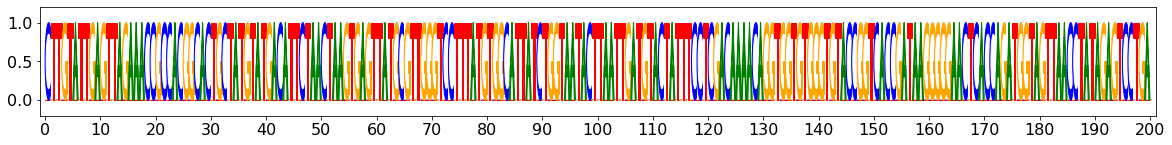

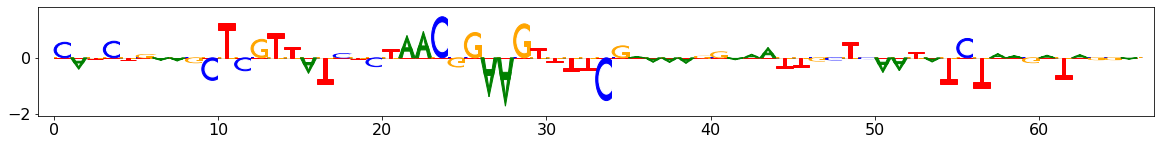

In [404]:
viz_sequence.plot_weights(onehot_data[0], subticks_frequency=10)
viz_sequence.plot_weights(scores[0], subticks_frequency=10)

In [405]:
task_scores = OrderedDict()
task_scores["task0"] = [np.array(x) for x in scores[:n]]

In [406]:
null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)

In [407]:
seqlet = modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
    trim_to_window_size=8,
    initial_flank_to_add=5,
    final_flank_to_add=5,
    final_min_cluster_size=30,
    n_cores=4)

In [408]:
tfmod = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=4,
    flank_size=2,
    target_seqlet_fdr=0.3,
    seqlets_to_patterns_factory=seqlet)

MEMORY 10.118656
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= -0.002717847069492564
Computing threshold
For increasing = True , the minimum IR precision was 0.2792491643095912 occurring at 5.532801151275635e-05 implying a frac_neg of 0.38744202640028547
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.0 occurring at -3.471188705400814e-07 implying a frac_neg of 1.00000010000001e-07
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -1.4544216096401215  and  1.1504376530647278 with frac passing 0.05579365079365079
Final raw thresholds are -1.4544216096401215  and  1.1504376530647278
Final transformed thresholds are -0.9563492063492064  and  0.9306349206349206


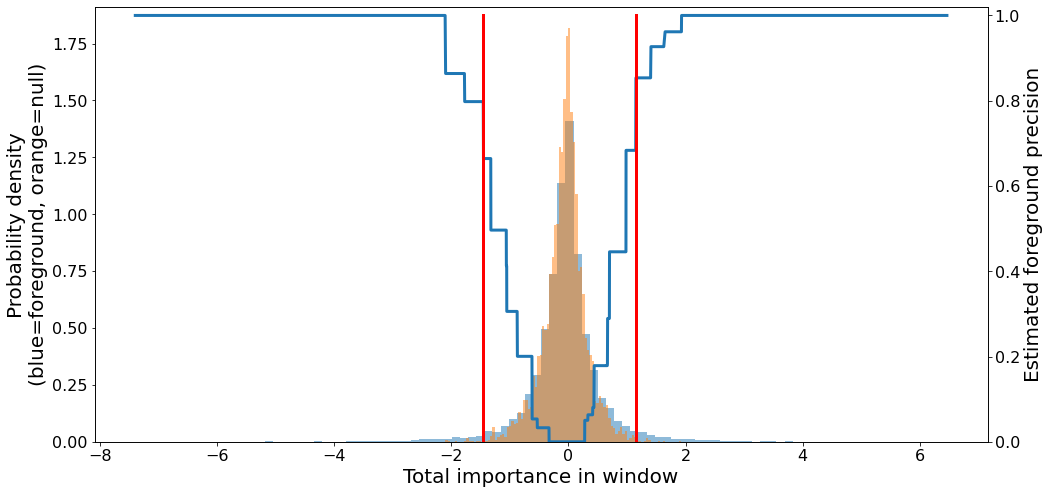

Got 265 coords
After resolving overlaps, got 265 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9305349206349206
MEMORY 10.118909952
265 identified in total
2 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [143, 122]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 10.118909952
On metacluster 1
Metacluster size 122
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 122
(Round 1) Computing coarse affmat
MEMORY 10.114203648
Beginning embedding computation
MEMORY 10.114203648
At the beginning of embedding call
MEMORY 10.114203648
before computing embeddings fwd
MEMORY 10.114203648


In [ ]:
test_tfmod_result = tfmod(task_names=["task0"],
      contrib_scores=task_scores,
      hypothetical_contribs=task_scores,
      one_hot=onehot,
      null_per_pos_scores=null_per_pos_scores)

In [398]:
import h5py
import modisco.util
![[ -e results.hdf5 ]] && rm results.hdf5
grp = h5py.File("results.hdf5", "w")
test_tfmod_result.save_hdf5(grp)
grp.close()

Metaclusters heatmap


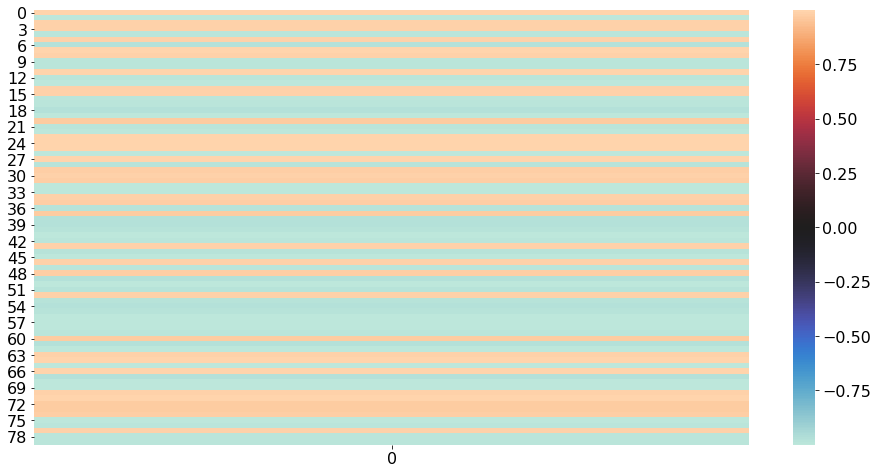

In [400]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
from matplotlib import pyplot as plt

import modisco.affinitymat.core
import modisco.cluster.phenograph.core
import modisco.cluster.phenograph.cluster
import modisco.cluster.core
import modisco.aggregator

hdf5_results = h5py.File("results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.mean(onehot_data, axis=(0,1))

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        #print("Task 1 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"]["fwd"])
        #print("Task 1 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        #print("Task 2 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"]["fwd"])
        #print("Task 2 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(pattern["sequence"]["fwd"])
        viz_sequence.plot_weights(pattern["sequence"]["rev"])
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        #Plot the subclustering too, if available
        if ("subclusters" in pattern):
            print("PLOTTING SUBCLUSTERS")
            subclusters = np.array(pattern["subclusters"])
            twod_embedding = np.array(pattern["twod_embedding"])
            plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=subclusters, cmap="tab20")
            plt.show()
            for subcluster_name in list(pattern["subcluster_to_subpattern"]["subcluster_names"]):
                subpattern = pattern["subcluster_to_subpattern"][subcluster_name]
                print(subcluster_name.decode("utf-8"), "size", len(subpattern["seqlets_and_alnmts"]["seqlets"]))
                subcluster = int(subcluster_name.decode("utf-8").split("_")[1])
                plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=(subclusters==subcluster))
                plt.show()
                viz_sequence.plot_weights(subpattern["task0_hypothetical_contribs"]["fwd"])
                viz_sequence.plot_weights(subpattern["task0_contrib_scores"]["fwd"])
                viz_sequence.plot_weights(subpattern["sequence"]["fwd"])
        
hdf5_results.close()

# Scratch
Place for old or testing code

# References